In [ ]:
#Outliers are data points that lies outside of overall dataset
#Based on IQR and Z-score
#Impacts are 1.causes various problems and errors in calculating mean and Sd


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [4]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])



In [5]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [6]:
print(df.tail())

         Values
99    47.654129
100   10.000000
101  110.000000
102    5.000000
103  120.000000


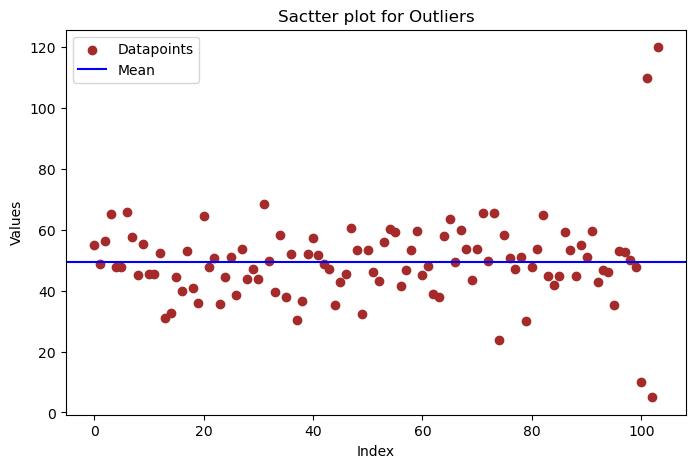

In [10]:
#Detecting Outliers
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='brown',label='Datapoints')
plt.axhline(y=df['Values'].mean(),color='blue',linestyle='-',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sactter plot for Outliers")
plt.legend()
plt.show()

***Using Box plot***

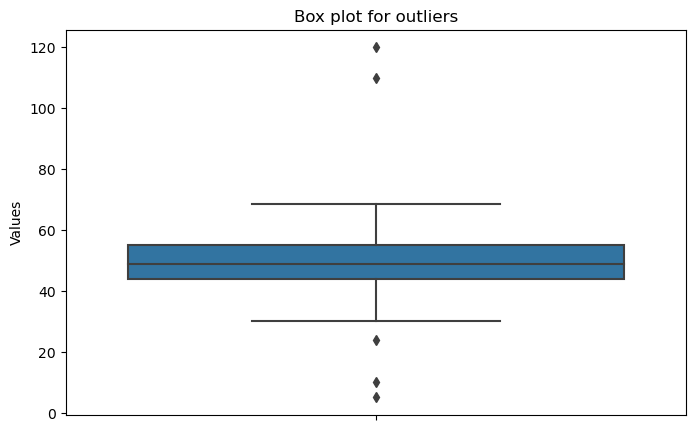

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for outliers")
plt.show()

***Z-score Method***
**The Z-score formula**
**z=x-$\mu$/$\sigma$**
**where: x=datapoint,$\mu$=Mean of data,$\sigma$=SD of data**
**Steps: 1.Compute the Z-score for each data point 2.if >3 and <-3 mark as outlier**

In [16]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


***IQR Method***

IQR=Q3-Q1

Steps:

1.Calculate Q1 and Q3

2.Compute Q3-Q1

3.Define lower and upper bounds:


loerbound=Q1-1.5*IQR

upperbound=Q3+1.5*IQR

4.Value outside these bounds is Outlier



In [21]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR'] == 'Outlier'])


         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

***The Interquartile Range (IQR) is calculated as:***
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

***Computer 5-number summary find outliers***

In [23]:
import numpy as np
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]
print(f"5-Number summary:\nMin:{min_value},Q1:{Q1},Median(Q2):{Q2},Q3:{Q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound:{lower_bound},UpperBound:{upper_bound}")
print(f"Outliers:{outliers}")

5-Number summary:
Min:5.0,Q1:43.874401021766715,Median(Q2):48.73043708220287,Q3:55.00852473036764,Max:120.0
IQR:11.134123708600924
Lower Bound:27.17321545886533,UpperBound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]


***Balancing a datset with Downsampling***

Imagine we have a datset for binary classfication task whrere the class labels are imbalanced, and we want to downsample the majority class to balaance the dataset

In [28]:
import pandas as pd
from sklearn.utils import resample

df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Low']
})
print(df)


    Age  Income Class
0    22    2000  High
1    25    2500   Low
2    27    2700   Low
3    28    3200  High
4    30    3500  High
5    35    3800   Low
6    40    4000  High
7    45    4200  High
8    50    4300   Low
9    55    4500   Low
10   60    5000  High
11   65    5500  High
12   70    6000   Low


In [29]:
df_high=df[df['Class']=='High']
df_low=df[df['Class']=='Low']
df_high

,Age,Income,Class
0,22,2000,High
3,28,3200,High
4,30,3500,High
6,40,4000,High
7,45,4200,High
10,60,5000,High
11,65,5500,High


In [30]:
df_low

,Age,Income,Class
1,25,2500,Low
2,27,2700,Low
5,35,3800,Low
8,50,4300,Low
9,55,4500,Low
12,70,6000,Low


In [32]:
#Downsample majority cls
df_high_downsampled=resample(df_high,replace=False,n_samples=len(df_low),random_state=42)
df_high_downsampled

,Age,Income,Class
0,22,2000,High
3,28,3200,High
10,60,5000,High
4,30,3500,High
7,45,4200,High
6,40,4000,High


In [35]:
df_balanced=pd.concat([df_high_downsampled,df_low])
df_balanced

,Age,Income,Class
0,22,2000,High
3,28,3200,High
10,60,5000,High
4,30,3500,High
7,45,4200,High
6,40,4000,High
1,25,2500,Low
2,27,2700,Low
5,35,3800,Low
8,50,4300,Low


In [36]:
print(df_balanced['Class'].value_counts())

Class
High    6
Low     6
Name: count, dtype: int64


***Upsampling Minority Class***

In [38]:
df_low_upsampled = resample(df_low, replace=True, n_samples=len(df_high), random_state=42)
print(df_low_upsampled)


   Age  Income Class
8   50    4300   Low
9   55    4500   Low
5   35    3800   Low
9   55    4500   Low
9   55    4500   Low
2   27    2700   Low
5   35    3800   Low


In [39]:
df_balanced=pd.concat([df_low_upsampled,df_high])
df_balanced

,Age,Income,Class
8,50,4300,Low
9,55,4500,Low
5,35,3800,Low
9,55,4500,Low
9,55,4500,Low
2,27,2700,Low
5,35,3800,Low
0,22,2000,High
3,28,3200,High
4,30,3500,High


In [40]:
print(df_balanced['Class'].value_counts())

Class
Low     7
High    7
Name: count, dtype: int64


In [43]:

df['Class'] = df['Class'].replace({'High': 'Majority', 'Low': 'Minority'})


print(df)


    Age  Income     Class
0    22    2000  Majority
1    25    2500  Minority
2    27    2700  Minority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Majority
7    45    4200  Majority
8    50    4300  Minority
9    55    4500  Minority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Minority


In [44]:
df_majority=df[df['Class']=='Majority']
df_minority=df[df['Class']=='Minority']
df_majority

,Age,Income,Class
0,22,2000,Majority
3,28,3200,Majority
4,30,3500,Majority
6,40,4000,Majority
7,45,4200,Majority
10,60,5000,Majority
11,65,5500,Majority


In [45]:
df_minority

,Age,Income,Class
1,25,2500,Minority
2,27,2700,Minority
5,35,3800,Minority
8,50,4300,Minority
9,55,4500,Minority
12,70,6000,Minority


In [46]:
#Downsample majority cls
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
df_majority_downsampled

,Age,Income,Class
0,22,2000,Majority
3,28,3200,Majority
10,60,5000,Majority
4,30,3500,Majority
7,45,4200,Majority
6,40,4000,Majority


In [47]:
df_balanced=pd.concat([df_majority_downsampled,df_minority])
df_balanced

,Age,Income,Class
0,22,2000,Majority
3,28,3200,Majority
10,60,5000,Majority
4,30,3500,Majority
7,45,4200,Majority
6,40,4000,Majority
1,25,2500,Minority
2,27,2700,Minority
5,35,3800,Minority
8,50,4300,Minority


In [48]:
print(df_balanced['Class'].value_counts())

Class
Majority    6
Minority    6
Name: count, dtype: int64


In [49]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
print(df_minority_upsampled)


   Age  Income     Class
8   50    4300  Minority
9   55    4500  Minority
5   35    3800  Minority
9   55    4500  Minority
9   55    4500  Minority
2   27    2700  Minority
5   35    3800  Minority


In [50]:
df_balanced=pd.concat([df_minority_upsampled,df_majority])
df_balanced

,Age,Income,Class
8,50,4300,Minority
9,55,4500,Minority
5,35,3800,Minority
9,55,4500,Minority
9,55,4500,Minority
2,27,2700,Minority
5,35,3800,Minority
0,22,2000,Majority
3,28,3200,Majority
4,30,3500,Majority


In [51]:
print(df_balanced['Class'].value_counts())

Class
Minority    7
Majority    7
Name: count, dtype: int64


***SMOTE***

***Synthetic Minority Over-sampling Technique***

***generates synthetic examples rather than simply duplicating existing ones***

In [2]:
!pip install --upgrade scikit-learn imbalanced-learn --user



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


***SMOTE generate synthetic samples instead of duplicates***

***Convert categorical into numeric***

***Apply SMOTE to balance datset***

***Convert back to original categorical lables***

***Combine the resampled data into final balanced datset***

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Minority', 'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Majority']
})
print(df)


    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority


In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
# Sample Data
data = {
    "Age": [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "Income": [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    "Class": ["Majority", "Minority", "Majority", "Majority", "Majority",
              "Minority", "Majority", "Majority", "Minority", "Minority",
              "Majority", "Majority", "Majority"]
}
df = pd.DataFrame(data)
# Step 1: Convert categorical target to numerical
df['Class'] = df['Class'].map({'Minority': 1, 'Majority': 0})
# Step 2: Check for NaN values and fix them
df['Class'].fillna(df['Class'].mode()[0], inplace=True)
# Step 3: Split features (X) and target variable (y)
X = df[['Age', 'Income']]
y = df['Class'].astype(int)  # Ensure it's an integer
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=['Age', 'Income']),
                         pd.DataFrame(y_resampled, columns=['Class'])], axis=1)
print(df_balanced['Class'].value_counts())  # Check class balance
print(df_balanced)


Class
0    9
1    9
Name: count, dtype: int64
    Age  Income  Class
0    22    2000      0
1    25    2500      1
2    27    2700      0
3    28    3200      0
4    30    3500      0
5    35    3800      1
6    40    4000      0
7    45    4200      0
8    50    4300      1
9    55    4500      1
10   60    5000      0
11   65    5500      0
12   70    6000      0
13   50    4331      1
14   37    3877      1
15   53    4459      1
16   37    3866      1
17   47    4220      1
